# Use Case
- Image Classification: SVM is used to classify images into different categories.
- Text Classification: SVM is effective in text categorization tasks such as spam detection, sentiment analysis, and topic categorization.
- Bioinformatics: SVM is used for protein classification and gene expression data analysis.
- Handwriting Recognition: SVM is employed to recognize handwritten characters.
- Financial Analysis: SVM is applied in credit risk analysis, fraud detection, and stock market prediction.

# Application Areas
- Healthcare: Disease prediction and diagnosis, medical image analysis.
- Finance: Credit scoring, fraud detection, algorithmic trading.
- Marketing: Customer segmentation, churn prediction.
- Manufacturing: Fault detection, quality control.
- Social Media: Sentiment analysis, spam filtering.

# Advantages
- Effective in High-Dimensional Spaces: SVM works well when the number of dimensions exceeds the number of samples.
- Memory Efficient: SVM only uses a subset of training points (support vectors) in the decision function.
- Versatile: Different kernel functions can be specified for the decision function, providing flexibility in handling different data structures.
- Robust to Overfitting: With proper regularization, SVM can avoid overfitting, especially in high-dimensional spaces.

# Disadvantages
- Computationally Intensive: Training an SVM can be time-consuming for large datasets, especially with complex kernel functions.
- Choice of Kernel: The performance of SVM heavily depends on the choice of the kernel and its parameters, which require careful tuning.
- Not Suitable for Large Datasets: SVMs are not suitable for very large datasets due to their high training time and memory consumption.
- Interpretability: SVM models are less interpretable compared to some other models like decision trees or logistic regression.

# Sample Implementations

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM model
svm = SVC(kernel='rbf', C=1, gamma=0.1)
svm.fit(X_train, y_train)

# Predict on test data
y_pred = svm.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Metrics Used for Evaluating SVM Classifier

## Confusion Matrix

- Definition: A confusion matrix is a table used to evaluate the performance of a classification model. It shows the counts of true positive (TP), - false positive (FP), true negative (TN), and false negative (FN) predictions.

- Importance: Provides a comprehensive view of the performance of a classification model, including both correct and incorrect predictions.

- Ideal Values: High values of TP and TN, and low values of FP and FN.

- Value Range: The values are non-negative integers, depending on the dataset size.

Interpretation:
- True Positives (TP): Correctly predicted positive cases.
- False Positives (FP): Incorrectly predicted positive cases.
- True Negatives (TN): Correctly predicted negative cases.
-  False Negatives (FN): Incorrectly predicted negative cases.

When to Use: Always use the confusion matrix for classification problems to get a detailed understanding of the model's performance.



In [2]:
from sklearn.metrics import confusion_matrix

y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


## Accuracy
- Definition: The ratio of correctly predicted observations to the total observations.
- Accuracy=TP+TN/TP+TN+FP+FN
- Importance: Provides an overall measure of how well the model is performing.
- Ideal Value: Close to 1 (100%).
- Value Range: [0, 1]

Interpretation: Indicates the proportion of correct predictions out of all predictions made.

When to Use: Use when the dataset is balanced or the cost of false positives and false negatives is similar.

In [3]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


## Precision
- Definition: The ratio of correctly predicted positive observations to the total predicted positives.
- Precision=TP/TP+FP
- Importance: Indicates the accuracy of positive predictions.
- Ideal Value: Close to 1 (100%).
- Value Range: [0, 1]

Interpretation: High precision indicates that the model has a low false positive rate.

When to Use: Use when the cost of false positives is high (e.g., spam detection).

In [4]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision}")


Precision: 1.0


## Recall (Sensitivity or True Positive Rate)
- Definition: The ratio of correctly predicted positive observations to all the observations in the actual class.
- Recall=TP/TP+FN
- Importance: Indicates the ability of the model to find all relevant cases within a dataset.
- Ideal Value: Close to 1 (100%).
- Value Range: [0, 1]
Interpretation: High recall indicates that the model has a low false negative rate.

When to Use: Use when the cost of false negatives is high (e.g., disease detection).

In [5]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall}")


Recall: 1.0


##  F1-Score

- Definition: The weighted average of precision and recall.
- F1-Score=2⋅Precision⋅RecallPrecision+Recall
- F1-Score=2⋅Precision+RecallPrecision⋅Recall​

- Importance: Provides a single metric that balances precision and recall, especially useful for imbalanced datasets.

- Ideal Value: Close to 1 (100%).

- Value Range: [0, 1]

Interpretation: High F1-score indicates a good balance between precision and recall.

When to Use: Use when both precision and recall are important for the problem at hand.

In [8]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1-Score: {f1}")


F1-Score: 1.0


## ROC Curve and AUC (Area Under the Curve)

- Definition: The ROC curve plots the true positive rate (recall) against the false positive rate (1-specificity) at various threshold settings. AUC measures the entire two-dimensional area underneath the ROC curve.

- Importance: Provides a graphical representation of the model's performance across all classification thresholds.

- Ideal Value: AUC close to 1 (100%).

- Value Range: [0, 1]

Interpretation: The closer the ROC curve is to the top-left corner, the better the model. A higher AUC indicates better overall performance.

When to Use: Use when you need to evaluate the model's ability to distinguish between positive and negative classes across all thresholds.


the ROC curve and AUC are not directly applicable to multi-class classification problems. They are designed for binary classification. For multi-class problems, you can use strategies like One-vs-Rest (OvR) or One-vs-One (OvO) to compute ROC curves and AUC scores for each class separately. 
I'll provide a corrected implementation for evaluating an SVM classifier on the Iris dataset using the ROC curve and AUC score with the One-vs-Rest strategy.



# Hyperparameters in SVM classifier

## C (Regularization Parameter)
- Definition: The regularization parameter CC controls the trade-off between maximizing the margin and minimizing the classification error. A smaller CC encourages a larger margin, while a larger CC aims to classify all training examples correctly.
- Importance: Balances the model complexity and the extent of misclassification on the training data.
- Ideal Value: Depends on the dataset; typically found using cross-validation.
- Value Range: C>0
Interpretation:
- Small CC: Larger margin, possibly more misclassifications.
- Large CC: Smaller margin, fewer misclassifications, but may overfit.

When to Use: Always tune CC to find a balance between bias and variance.

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(SVC(kernel='rbf', gamma=0.1), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best C: {grid_search.best_params_['C']}")


Best C: 1


## Kernel Type
- Definition: The kernel function transforms the input data into a higher-dimensional space to find a linear separator.
- Importance: Determines the shape of the decision boundary.
- Common Kernels:
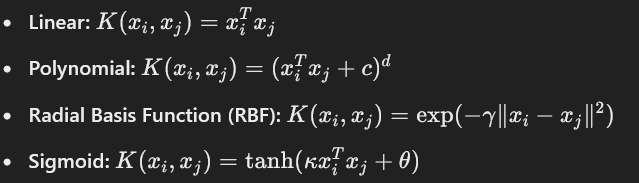
- Ideal Value: Depends on the dataset and the problem.
Interpretation:
- Linear: Best for linearly separable data.
- Polynomial and RBF: Best for non-linearly separable data.
- Sigmoid: Can be used but is less common.

When to Use: Experiment with different kernels and use cross-validation to select the best one.

In [19]:
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} # rbf generally used
grid_search = GridSearchCV(SVC(C=1, gamma=0.1), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best kernel: {grid_search.best_params_['kernel']}")


Best kernel: rbf


## Gamma (Kernel Coefficient for RBF, Polynomial, and Sigmoid Kernels)
- Definition: Defines how far the influence of a single training example reaches. Low values mean 'far' and high values mean 'close'.

- Importance: Affects the decision boundary shape.

- Ideal Value: Depends on the dataset; typically found using cross-validation.

- Value Range: γ>0
Interpretation:
- Low gamma: The model is too constrained and has a high bias.
- High gamma: The model captures more details but may overfit.

When to Use: Always tune γγ for non-linear kernels like RBF.

In [20]:
param_grid = {'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
grid_search = GridSearchCV(SVC(kernel='rbf', C=1), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best gamma: {grid_search.best_params_['gamma']}")


Best gamma: 0.1


## Degree (for Polynomial Kernel)
- Definition: Degree of the polynomial kernel function.
- Importance: Controls the flexibility of the polynomial kernel.
- Ideal Value: Typically a small integer; found using cross-validation.
- Value Range: degree≥1degree≥1

Interpretation:
- Low degree: Simpler decision boundary.
- High degree: More complex decision boundary, risk of overfitting.

When to Use: Only relevant for the polynomial kernel. Tune using cross-validation.

In [21]:
param_grid = {'degree': [2, 3, 4, 5]}
grid_search = GridSearchCV(SVC(kernel='poly', C=1, gamma=0.1), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best degree: {grid_search.best_params_['degree']}")


Best degree: 3


## Coef0 (for Polynomial and Sigmoid Kernels)

- Definition: Independent term in kernel function. It is significant in controlling the influence of higher-order versus lower-order terms in the polynomial and sigmoid kernels.

- Importance: Adjusts the model complexity for polynomial and sigmoid kernels.

- Ideal Value: Typically found using cross-validation.

- Value Range: Any real number.

Interpretation:

- Low coef0: Less influence of higher-order terms.
- High coef0: More influence of higher-order terms.

When to Use: Tune for polynomial and sigmoid kernels.

In [22]:
param_grid = {'coef0': [0, 0.1, 0.5, 1, 2]}
grid_search = GridSearchCV(SVC(kernel='poly', C=1, gamma=0.1, degree=3), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best coef0: {grid_search.best_params_['coef0']}")


Best coef0: 1


## Probability

- Definition: Whether to enable probability estimates.

- Importance: Useful if you need probability estimates for your classification problem.

- Ideal Value: True or False.

- Value Range: True or False.

Interpretation: Enables the model to output probability estimates. Adds computational overhead.

When to Use: When you need probability estimates for your predictions.

In [23]:
svm = SVC(C=1, gamma=0.1, probability=True)
svm.fit(X_train, y_train)
y_pred_prob = svm.predict_proba(X_test)


Summary

Selecting and tuning hyperparameters for SVM is crucial for model performance. Use cross-validation to find the optimal values for:

- C (Regularization Parameter): Balances margin maximization and misclassification minimization.
- Kernel Type: Determines the transformation of input data into a higher-dimensional space.
- Gamma (for RBF, Polynomial, and Sigmoid Kernels): Controls the influence radius of training examples.
- Degree (for Polynomial Kernel): Sets the degree of the polynomial kernel function.
- Coef0 (for Polynomial and Sigmoid Kernels): Adjusts the influence of higher-order terms.
- Probability: Enables probability estimates for predictions.

By systematically tuning these hyperparameters, you can improve the performance and robustness of your SVM model.

# SVM in Regression mode

In [25]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load dataset
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVR model
svr = SVR(kernel='rbf', C=1, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)

# Predict on test data
y_pred = svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.3575335619549484


# Metrics used in Regressor

Sure, here's a detailed explanation of all the metrics for evaluating an SVM regressor, similar to your example for a confusion matrix:
1. Mean Squared Error (MSE)

- Definition: MSE measures the average of the squares of the errors—that is, the average squared difference between the actual values and the predicted values.

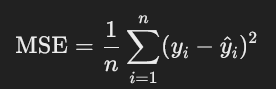

- Importance: MSE gives a sense of the average magnitude of errors made by the model. It is sensitive to outliers due to the squaring of errors.

- Ideal Values: An MSE close to 0 indicates a perfect fit.

- Value Range: [0, ∞)

Interpretation:
    - Lower MSE: Indicates a better fit of the model to the data.
    - Higher MSE: Indicates a worse fit, with more significant errors.

- When to Use: Use MSE when you want to penalize larger errors more significantly due to the squaring of the errors.

2. Mean Absolute Error (MAE)

- Definition: MAE measures the average of the absolute errors—that is, the average absolute difference between the actual values and the predicted values.
    
    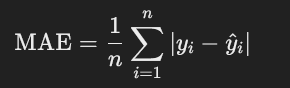

- Importance: MAE gives a sense of the average magnitude of errors made by the model without squaring them, making it less sensitive to outliers than MSE.

- Ideal Values: An MAE close to 0 indicates a perfect fit.

- Value Range: [0, ∞)

Interpretation:
- Lower MAE: Indicates a better fit of the model to the data.
- Higher MAE: Indicates a worse fit, with more significant errors.

When to Use: Use MAE when you want to treat all errors equally, regardless of their magnitude.

3. Root Mean Squared Error (RMSE)

- Definition: RMSE is the square root of the MSE. It gives an estimate of the standard deviation of the errors.
  
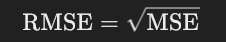
    ​
- Importance: RMSE provides an error metric in the same units as the target variable, making it easier to interpret.

- Ideal Values: An RMSE close to 0 indicates a perfect fit.

- Value Range: [0, ∞)

- Interpretation:
    - Lower RMSE: Indicates a better fit of the model to the data.
    - Higher RMSE: Indicates a worse fit, with more significant errors.

- When to Use: Use RMSE when you want an error metric in the same units as the target variable.

4. R-squared (Coefficient of Determination)

- Definition: R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables.
    
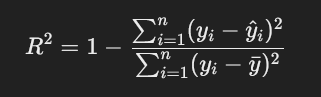

- Importance: R-squared provides a measure of how well the observed outcomes are replicated by the model, based on the proportion of total variation explained by the model.

- Ideal Values: An R-squared close to 1 indicates a perfect fit.

- Value Range: [0, 1] for a model that fits better than the mean, can be negative for models that fit worse than the mean.

- Interpretation:
- Higher R-squared: Indicates a better fit of the model to the data.
- Lower R-squared: Indicates a worse fit, with less variance explained by the model.

- When to Use: Use R-squared to understand the proportion of variance explained by the model.

5. Adjusted R-squared

- Definition: Adjusted R-squared adjusts the R-squared value based on the number of predictors in the model, accounting for the degrees of freedom.
    
    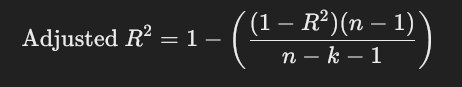

    where n is the number of observations and k is the number of predictors.

- Importance: Adjusted R-squared provides a more accurate measure of the goodness-of-fit for models with multiple predictors by penalizing the addition of irrelevant variables.

- Ideal Values: An adjusted R-squared close to 1 indicates a perfect fit.

- Value Range: [0, 1] for a model that fits better than the mean, can be negative for models that fit worse than the mean.

- Interpretation:
    - Higher Adjusted R-squared: Indicates a better fit of the model to the data.
    - Lower Adjusted R-squared: Indicates a worse fit, with less variance explained by the model after adjusting for the number of predictors.

- When to Use: Use adjusted R-squared when comparing models with a different number of predictors.

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")
print(f"Adjusted R2 Score: {adjusted_r2}")

Mean Squared Error: 0.3575335619549484
Mean Absolute Error: 0.40314012400297067
Root Mean Squared Error: 0.5979411024130624
R2 Score: 0.727601800641012
Adjusted R2 Score: 0.7272493527039472


# Hyperparameter used inSVM regressor

1. C (Regularization Parameter)
2. Kernel
3. Gamma (Kernel Coefficient for RBF, Polynomial, and Sigmoid Kernels)
4. Degree (for Polynomial Kernel)
5. Coef0 (for Polynomial and Sigmoid Kernels)
6. Epsilon (for epsilon-Support Vector Regression)
    - Definition: The epsilon parameter specifies the epsilon-tube within which no penalty is associated with the training loss function in SVR.

    -Importance: Defines a margin of tolerance where no penalty is given for errors. It affects the number of support vectors used.

    - Ideal Values: Typically found using cross-validation. Common values to try are [0.1, 0.2, 0.5, 0.3].

    Value Range: ϵ≥0

    - Interpretation:

        - Low epsilon: More points are considered as support vectors, possibly overfitting.
        - High epsilon: Fewer points are considered as support vectors, possibly underfitting.

    -When to Use: Tune ϵϵ to control the sensitivity of the model to deviations.

Summary of Hyperparameters:

- C (Regularization Parameter): Controls the trade-off between margin maximization and error minimization. Prevents overfitting by penalizing large coefficients.
- Kernel: Determines the transformation of input data and the shape of the decision boundary. Common kernels include linear, polynomial, RBF, and sigmoid.
- Gamma (for RBF, Polynomial, and Sigmoid Kernels): Controls the influence of a single training example. Affects the decision boundary's smoothness.
- Degree (for Polynomial Kernel): Sets the degree of the polynomial. Higher degrees allow for more complex decision boundaries.
- Epsilon (ε): Specifies the epsilon-tube within which no penalty is associated with the training loss function. Affects the number of support vectors used.
- Coef0 (for Polynomial and Sigmoid Kernels): Adjusts the influence of higher-order terms in the polynomial and sigmoid kernels.


In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Load dataset
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning
param_grid = {
    'C': [0.1],
    # 'gamma': [1, 0.1],
    # 'epsilon': [0.1],
    'kernel': ['rbf'],
    # 'degree': [2]  # Only used for poly kernel
}
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Train the model with best parameters
best_svr = grid_search.best_estimator_
best_svr.fit(X_train, y_train)

# Predict on test data
y_pred = best_svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")
print(f"Adjusted R2 Score: {adjusted_r2}")


Best parameters: {'C': 0.1, 'kernel': 'rbf'}
Mean Squared Error: 0.4092977775764426
Mean Absolute Error: 0.4306663881347529
Root Mean Squared Error: 0.6397638451619805
R2 Score: 0.688163603428348
Adjusted R2 Score: 0.6877601275796381


- Model accuracy score : accuracy_score(y_test, y_pred)
- check accuracy across model_accruracy(y_train, y_pred_pred) -- 
- compare check for overfitting
    - check accuracy across model.score(x_train, y_train)
    -model.score(X_test, y_test)
    - if comparable no overfitting
Compare model accuracy with null accuracy¶
- y_test.value_counts()
- null accuracy = max_value_count/total_value_count






# SVM vs logistics regression

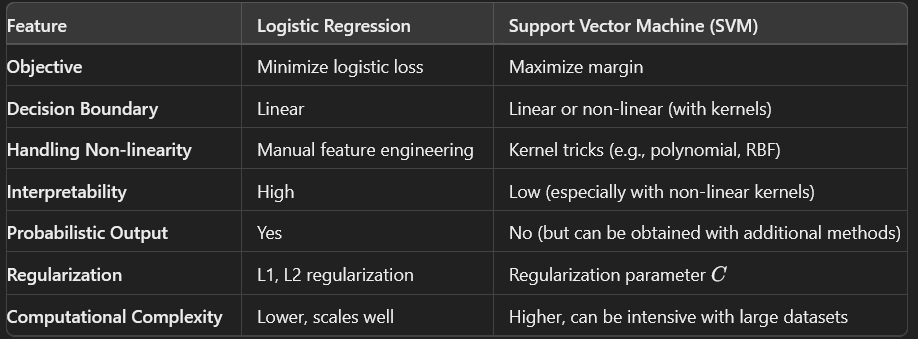